# SQL Injection Detection using Machine Learning

In [56]:
%pip install seaborn
%pip install nltk
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
# importing required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Reading sql data file 

In [58]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\SQLInjectionML\dataset\sqlCleaned.csv', encoding = 'utf-16') # Read the dataset.
# df = pd.read_csv(r'C:\Users\Dell\Desktop\SQLInjectionML\dataset\SQLRaw.csv') # Read the dataset.
df.head(10)

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
5,?,1
6,' and 1 = 0 ) union all,1
7,? or 1 = 1 --,1
8,x' and userid is NULL; --,1
9,x' and email is NULL; --,1


## Shape of Dataframe

In [59]:
df.shape

(4200, 2)

In [5]:
# df.drop(["Unnamed: 2","Unnamed: 3"], axis=1, inplace=True)

In [6]:
# df

## Dataframe column information 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.8+ KB


## Describe Dataframe 

In [61]:
df.describe(include="all")

,Sentence,Label
count,4187,4200.000000
unique,3950,NaN
top,S,NaN
freq,29,NaN
mean,NaN,0.268571
std,NaN,0.443269
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


## Describe Label column 

In [62]:
df['Label'].describe()

count    4200.000000
mean        0.268571
std         0.443269
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Label, dtype: float64

## Check null values 

In [63]:
df.isna().sum()

Sentence    13
Label        0
dtype: int64

## Drop null values 

In [64]:
df.dropna(inplace=True)

## Check null values after dropping null values 

In [65]:
df.isna().sum()

Sentence    0
Label       0
dtype: int64

##  Count values where Label is 1 

In [66]:
df[df['Label'] == 1].count() # Count how much label are 1.

Sentence    1127
Label       1127
dtype: int64

##  Count values where Label is 0

In [67]:
df[df['Label'] == 0].count() # Count how much label are 0.

Sentence    3060
Label       3060
dtype: int64

## Label value counts

In [68]:
df['Label'].value_counts()

0    3060
1    1127
Name: Label, dtype: int64

## Plot label counts 

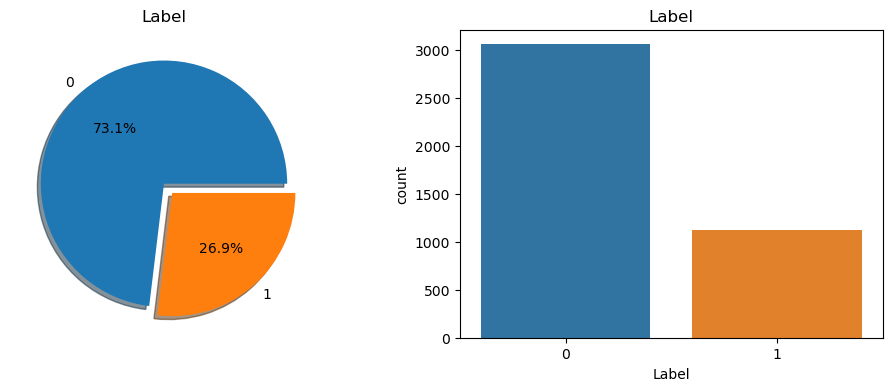

In [69]:
f,ax=plt.subplots(1,2,figsize=(12,4))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)


ax[0].set_title('Label')
ax[0].set_ylabel('')
sns.countplot(x=df["Label"],ax=ax[1])
ax[1].set_title('Label')
plt.show()

# Approach 1. Count Vectorizer

##  CountVectorizer - Convert a collection of text documents to a matrix of token counts

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [70]:
X = df['Sentence']
y = df['Label']
# CountVectorizer - Convert a collection of text documents to a matrix of token counts
count_vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = count_vectorizer.fit_transform(X.values.astype('U')).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [18]:
count_vectorizer.get_feature_names()

C:\Users\Public\DataScience\envs\sqlinjection\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '01',
 '04',
 '0x730065006c00650063007400200040004000760065007200730069006f006e00',
 '0x73656c65637420404076657273696f6e',
 '0x77616974666f722064656c61792027303a303a31302700',
 '10',
 '100',
 '10000000',
 '100aklima',
 '101',
 '106',
 '108',
 '11',
 '110',
 '112',
 '115',
 '116',
 '12',
 '120',
 '1234',
 '125',
 '129',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '172',
 '18',
 '19',
 '1966',
 '1970s',
 '1992',
 '1997',
 '1_',
 '1a',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2017',
 '201704',
 '202',
 '2020',
 '203',
 '21',
 '214',
 '22',
 '220',
 '23',
 '24',
 '25',
 '250',
 '250th',
 '255',
 '26',
 '27',
 '28',
 '28mail',
 '28objectclass',
 '29',
 '2a',
 '2b',
 '30',
 '300',
 '31',
 '32',
 '325',
 '33',
 '330',
 '35',
 '36',
 '365',
 '37',
 '38',
 '39',
 '3d',
 '40',
 '4000',
 '4039',
 '40select',
 '41',
 '42',
 '44',
 '45',
 '457',
 '46',
 '47',
 '49'

### Train-test split 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X_train.shape - ",X_train.shape)
print("y_train.shape -", y_train.shape)
print("X_test.shape -", X_test.shape)
print("y_test.shape -", y_test.shape)

X_train.shape -  (3349, 4716)
y_train.shape - (3349,)
X_test.shape - (838, 4716)
y_test.shape - (838,)


In [19]:
X_test[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## LogisticRegression Classifier 

In [73]:
lr_clf = LogisticRegression() 
lr_clf.fit(X_train, y_train) # training
y_pred = lr_clf.predict(X_test)
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")

Accuracy of Logistic Regression on test set : 0.964200477326969
F1 Score of Logistic Regression on test set : 0.923076923076923


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       592
           1       0.99      0.77      0.87       246

    accuracy                           0.93       838
   macro avg       0.95      0.89      0.91       838
weighted avg       0.94      0.93      0.93       838



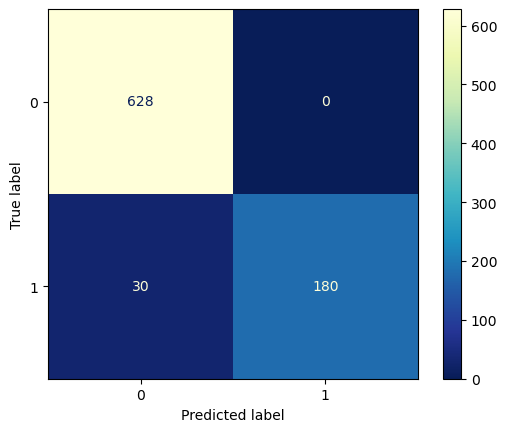

In [74]:
confmatrix = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Saving the Logistic Regression model 

## RandomForestClassifier 

In [23]:
# create RandomForestClassifier model instance
rf_clf = RandomForestClassifier()
# fit RandomForestClassifier model
rf_clf.fit(X_train, y_train)
# make predictions
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

Accuracy of Random Forest on test set : 0.9128878281622912
F1 Score of Random Forest on test set : 0.8707964601769912


### Classification Report of RandomForestClassifier

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       628
           1       1.00      0.86      0.92       210

    accuracy                           0.96       838
   macro avg       0.98      0.93      0.95       838
weighted avg       0.97      0.96      0.96       838



### Confusion  matrix of RandomForest Classifier

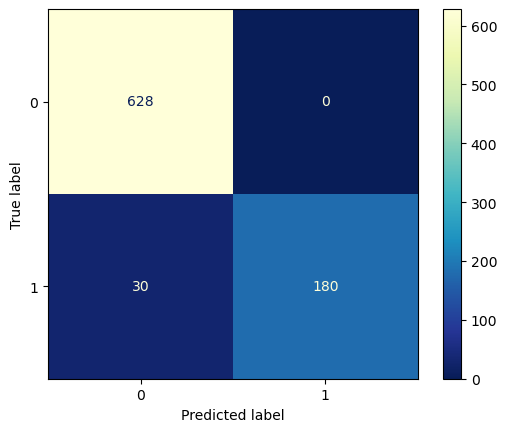

In [76]:
confmatrix = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Saving the Random Forest Model 

In [26]:
import joblib

  
# Save the model as a pickle in a file
joblib.dump(rf_clf, r'C:\Users\Snehal Thakur\PycharmProjects\SQLInjectionML\models\rf_clf.pkl')
  
# # Load the model from the file
# rf_clf_from_joblib = joblib.load('/models/rf_clf.pkl')
  
# # Use the loaded model to make predictions
# rf_clf_from_joblib.predict(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Snehal Thakur\\PycharmProjects\\SQLInjectionML\\models\\rf_clf.pkl'

## XGBoost Classifier 

In [77]:
# create XGBoost model instance
xgb_clf = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.01, alpha = 10,objective='binary:logistic')
# fit XGBoost model
xgb_clf.fit(X, y)
# make predictions
y_pred = xgb_clf.predict(X_test)
print(f"Accuracy of XGBClassifier on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of XGBClassifier on test set : {f1_score(y_pred, y_test)}")

Accuracy of XGBClassifier on test set : 0.9152744630071599
F1 Score of XGBClassifier on test set : 0.7965616045845273


### Classification Report of XGBoost Classifier

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       628
           1       1.00      0.66      0.80       210

    accuracy                           0.92       838
   macro avg       0.95      0.83      0.87       838
weighted avg       0.92      0.92      0.91       838



### Confusion Matrix of XGBoost Classifier

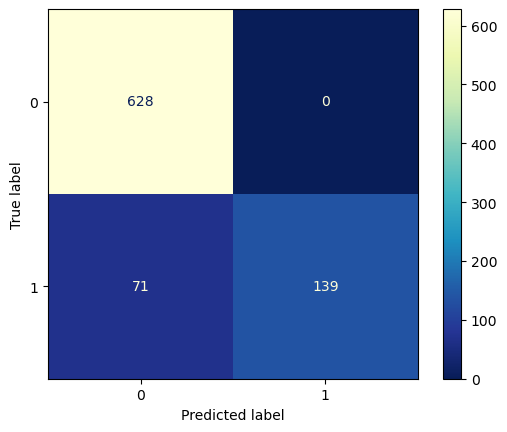

In [79]:
confmatrix = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Saving the XGBoost Model 

In [32]:
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(xgb_clf, r'C:\Users\Snehal Thakur\PycharmProjects\SQLInjectionML\models\xgb_clf.pkl')
  
# # Load the model from the file
# xgb_clf_from_joblib = joblib.load('/models/xgb_clf.pkl')
  
# # Use the loaded model to make predictions
# xgb_clf_from_joblib.predict(X_test)

['C:\\Users\\Snehal Thakur\\PycharmProjects\\SQLInjectionML\\models\\xgb_clf.pkl']

## ExtraTreesClassifier 

In [80]:
# create ExtraTreesClassifier model instance
xtree_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
# fit ExtraTreesClassifier model
xtree_clf.fit(X, y)
# make predictions
y_pred = xtree_clf.predict(X_test)
print(f"Accuracy of ExtraTreesClassifier on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of ExtraTreesClassifier on test set : {f1_score(y_pred, y_test)}")

Accuracy of ExtraTreesClassifier on test set : 0.9821002386634845
F1 Score of ExtraTreesClassifier on test set : 0.9655172413793104


### Classification Report of ExtraTreesClassifier

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       592
           1       0.95      1.00      0.97       246

    accuracy                           0.98       838
   macro avg       0.97      0.99      0.98       838
weighted avg       0.98      0.98      0.98       838



### Confusion Matrix of ExtraTreesClassifier

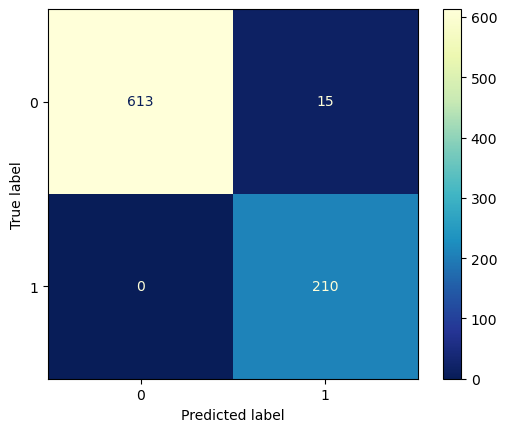

In [81]:
confmatrix = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Saving the Extratree classifier model 

In [36]:
import joblib
  
  
# Save the model as a pickle in a file (Use your model dir path)
joblib.dump(xtree_clf, r'C:\Users\Snehal Thakur\PycharmProjects\SQLInjectionML\models\xtree_clf.pkl')
  
# # Load the model from the file
# xtree_clf_from_joblib = joblib.load('/models/xtree_clf.pkl')
  
# # Use the loaded model to make predictions
# xtree_clf_from_joblib.predict(X_test)

['C:\\Users\\Snehal Thakur\\PycharmProjects\\SQLInjectionML\\models\\xtree_clf.pkl']

# Approach 2. TF-IDF Vectorizer

## TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features. 

In [82]:
# TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features.# 

X = df['Sentence']
y = df['Label']

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X.values.astype('U')).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06693684, 0.        ,
        0.        ]])

In [34]:
# feature names
tfidf_vectorizer.get_feature_names()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '00001491382788757',
 '00001491528420366',
 '00001491528883971',
 '00001491529916387',
 '00001491529916625',
 '00001491530124766',
 '00001491530253354',
 '00001491530253903',
 '00001491530747318',
 '00001491531111591',
 '00001491531111628',
 '00001491531280013',
 '00001491531338012',
 '00001491531745287',
 '00001491531967789',
 '001000000000000022',
 '004',
 '004000000000000011',
 '004000000000000012',
 '01',
 '010',
 '0101',
 '0102',
 '01024328836',
 '01026253919',
 '01052578483',
 '01055251172',
 '01055511178',
 '01082117188',
 '01087911493',
 '0109',
 '0124',
 '02',
 '02_01',
 '031003000270000',
 '032',
 '04',
 '05',
 '06',
 '067',
 '07',
 '08',
 '09',
 '0aia2oyla5nt1ckw3',
 '0px',
 '0qi5exwmdn30ulwjftbmc',
 '0x64',
 '0x65',
 '0x70',
 '0x72',
 '0x730065006c00650063',
 '0x730065006c0065006300740020004000400076006500',
 '0x730065006c00650063007400200040004000760065007200730069006f006e00',
 '0x73656c',
 '0x73656c6',
 '0x73656c65637420404076657273696f6e',
 '0x74',
 '0x77

### Train Test Split 

In [83]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size = 0.2)
print("X_train_tfidf.shape=", X_train_tfidf.shape)
print("y_train_tfidf.shape=", y_train_tfidf.shape)
print("X_test_tfidf.shape=", X_test_tfidf.shape)
print("y_test_tfidf.shape=", y_test_tfidf.shape)

X_train_tfidf.shape= (3349, 9911)
y_train_tfidf.shape= (3349,)
X_test_tfidf.shape= (838, 9911)
y_test_tfidf.shape= (838,)


##  Random Forest Classifier

In [84]:
# create RandomForestClassifier model instance
rf_clf_tfidf = RandomForestClassifier()
# fit RandomForestClassifier model
rf_clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# make predictions
y_pred_tfidf = rf_clf_tfidf.predict(X_test_tfidf)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred_tfidf, y_test_tfidf)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred_tfidf, y_test_tfidf)}")

Accuracy of Random Forest on test set : 0.9749403341288783
F1 Score of Random Forest on test set : 0.9515011547344111


### Classification Report 

In [85]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       632
           1       0.91      1.00      0.95       206

    accuracy                           0.97       838
   macro avg       0.95      0.98      0.97       838
weighted avg       0.98      0.97      0.98       838



### Confusion Matrix 

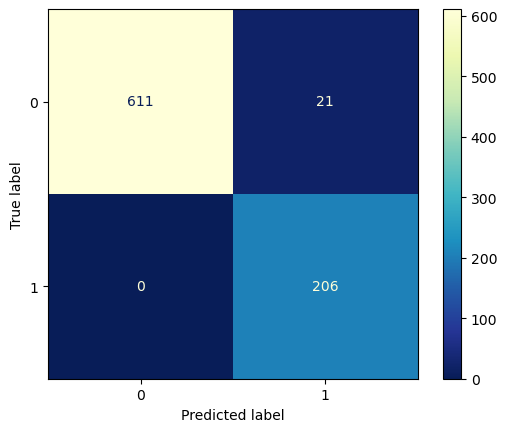

In [86]:
confmatrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

## XGBoost Classifier 

In [87]:
# create XGBoost model instance
xgb_clf_tfidf = XGBClassifier(n_estimators=50, max_depth=5, learning_rate=0.01, alpha = 10,objective='binary:logistic')
# fit XGBoost model
xgb_clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# make predictions
y_pred_tfidf = xgb_clf_tfidf.predict(X_test_tfidf)
print(f"Accuracy of XGBClassifier on test set : {accuracy_score(y_pred_tfidf, y_test_tfidf)}")
print(f"F1 Score of XGBClassifier on test set : {f1_score(y_pred_tfidf, y_test_tfidf)}")

Accuracy of XGBClassifier on test set : 0.9463007159904535
F1 Score of XGBClassifier on test set : 0.8773841961852862


### Classification Report 

In [88]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       632
           1       1.00      0.78      0.88       206

    accuracy                           0.95       838
   macro avg       0.97      0.89      0.92       838
weighted avg       0.95      0.95      0.94       838



### Confusion Matrix 

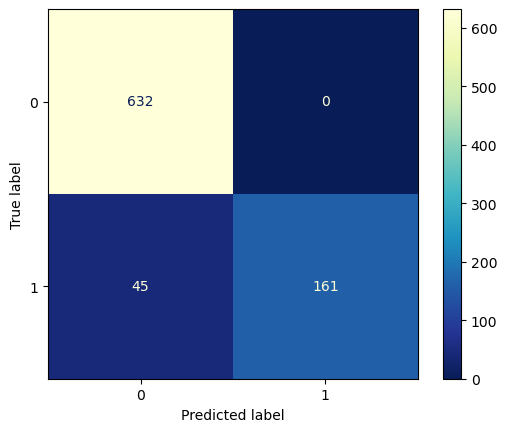

In [89]:
confmatrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

## Extratree Classifier 

In [42]:
# create ExtraTreesClassifier model instance
xtree_clf_tfidf = ExtraTreesClassifier(n_estimators=100, random_state=0)
# fit ExtraTreesClassifier model
xtree_clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
# make predictions
y_pred_tfidf = xtree_clf_tfidf.predict(X_test_tfidf)
print(f"Accuracy of ExtraTreesClassifier on test set : {accuracy_score(y_pred_tfidf, y_test_tfidf)}")
print(f"F1 Score of ExtraTreesClassifier on test set : {f1_score(y_pred_tfidf, y_test_tfidf)}")

Accuracy of ExtraTreesClassifier on test set : 0.9677804295942721
F1 Score of ExtraTreesClassifier on test set : 0.9452332657200813


### Classification Report 

In [90]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       632
           1       1.00      0.78      0.88       206

    accuracy                           0.95       838
   macro avg       0.97      0.89      0.92       838
weighted avg       0.95      0.95      0.94       838



### Confusion Matrix 

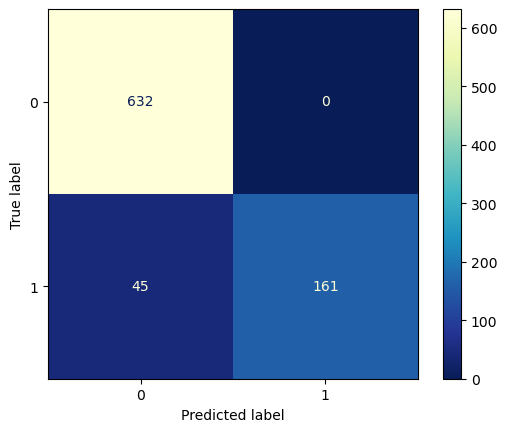

In [91]:
confmatrix = confusion_matrix(y_test_tfidf, y_pred_tfidf)
cm = ConfusionMatrixDisplay(confmatrix, display_labels=["0", "1"])
cm.plot(cmap="YlGnBu_r")
plt.show()

### Testing of Extratree Classifier model on unknown data

In [ ]:
text=input(" Enter your text for prediction ")

In [ ]:
# print('Vectorized Input:')
v0 = tfidf_vectorizer.transform([text]).toarray()
# print(v0)
pred = xtree_clf_tfidf.predict(v0)
#print("Predicted Output = ",pred)
if pred[0]==0:
    print("It seems to be safe input")
else:
    print("ALERT :::: This can be SQL injection")